In [1]:
#Imports
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from PIL import Image
import cv2
import os
from tqdm import tqdm
from random import shuffle
import time
import math
from datetime import timedelta

from keras.models import Sequential, Model
from keras.layers import InputLayer, Input, Dropout, SpatialDropout2D
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
from train_test import *
from nnfunc import *

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [4]:
# Create the data for the images and labels and save it into a .npy file
def create_data():
    data = [] 
    
    for img in tqdm(os.listdir(DATA_DIR)):
        label = label_img(img)
        path = os.path.join(DATA_DIR, img)
        img = Image.open(path)
        img = np.array(img)
        img = cv2.resize(img, (IMG_SIZE_PREPRO, IMG_SIZE_PREPRO))
        data.append([np.array(img), np.array(label)])

    shuffle(data)
    np.save(SAVED_DATA_FILE, data)

In [5]:
def split_image_label(data):
    images = np.array([i[0] for i in data]).reshape(-1,IMG_SIZE_PREPRO,IMG_SIZE_PREPRO, NB_CHANNELS)
    labels = np.array([i[1] for i in data])
    return images, labels

In [6]:
# Constant values 128-112, 64-60
DATA_DIR = 'train/train'
SAVED_DATA_FILE = 'data64.npy'
BATCH_SIZE = 64
IMG_SIZE_PREPRO = 64
IMG_SIZE = 9
NB_CHANNELS = 3
GREYSCALE = False
LR = 1e-4

In [7]:
# Take the images from the folder, extract the label, same all the samples into a .npy file
#create_data()

In [8]:
# Load the data from the .npy file
data = np.load(SAVED_DATA_FILE)

In [9]:
# Splitting into train and test set
train = data[:20000]
test = data[20000:]

In [10]:
# Separating images and labels
train_images, train_labels = split_image_label(train)
test_images, test_labels = split_image_label(test)

In [11]:
train_images = train_images/255
test_images = test_images/255

([array([2462., 2579.]), array([2579., 2462.])],
 array([0. , 0.5, 1. ]),
 <a list of 2 Lists of Patches objects>)

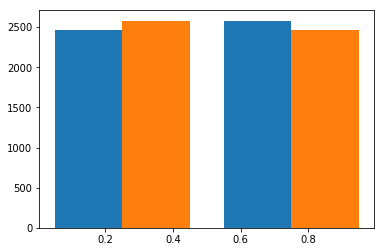

In [12]:
plt.hist(test_labels, bins = 2)

True: [1 0]


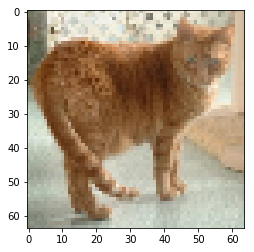

In [13]:
num = 6
plot_image(train_images[num], train_labels[num])

In [14]:
inputs = Input(shape=(IMG_SIZE_PREPRO, IMG_SIZE_PREPRO, NB_CHANNELS))
net = inputs
net = Conv2D(32, 5, activation='relu', padding='same', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=(2,2), strides=2)(net)
net = Conv2D(64, 5, activation='relu', padding='same', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)
net = Conv2D(128, 5, activation='relu', padding='same', name='layer_conv3')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)
net = Conv2D(256, 5, activation='relu', padding='same', name='layer_conv4')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)
net = Flatten()(net)
net = Dense(512, activation='relu')(net)
net = Dropout(0.5)(net)
net = Dense(2, activation='softmax')(net)
outputs = net

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
model.fit(x=train_images, y=train_labels, verbose=1, epochs=45, batch_size=128)

Epoch 1/45
20000/20000 [==============================] - ETA: 628s - loss: 8.9405 - acc: 0.445 - ETA: 619s - loss: 8.9405 - acc: 0.445 - ETA: 610s - loss: 8.9405 - acc: 0.445 - ETA: 603s - loss: 8.8146 - acc: 0.453 - ETA: 598s - loss: 8.6131 - acc: 0.465 - ETA: 594s - loss: 8.2899 - acc: 0.485 - ETA: 590s - loss: 8.3289 - acc: 0.483 - ETA: 586s - loss: 8.2952 - acc: 0.485 - ETA: 583s - loss: 8.1850 - acc: 0.492 - ETA: 578s - loss: 8.1472 - acc: 0.494 - ETA: 573s - loss: 8.1277 - acc: 0.495 - ETA: 569s - loss: 8.1850 - acc: 0.492 - ETA: 565s - loss: 8.2140 - acc: 0.490 - ETA: 560s - loss: 8.1850 - acc: 0.492 - ETA: 557s - loss: 8.1430 - acc: 0.494 - ETA: 554s - loss: 8.1456 - acc: 0.494 - ETA: 550s - loss: 8.1776 - acc: 0.492 - ETA: 546s - loss: 8.1430 - acc: 0.494 - ETA: 544s - loss: 8.1121 - acc: 0.496 - ETA: 542s - loss: 8.1094 - acc: 0.496 - ETA: 540s - loss: 8.1250 - acc: 0.495 - ETA: 536s - loss: 8.1735 - acc: 0.492 - ETA: 533s - loss: 8.2288 - acc: 0.489 - ETA: 529s - loss: 8.17

20000/20000 [==============================] - ETA: 607s - loss: 8.5627 - acc: 0.468 - ETA: 603s - loss: 7.9331 - acc: 0.507 - ETA: 599s - loss: 8.0171 - acc: 0.502 - ETA: 595s - loss: 7.9961 - acc: 0.503 - ETA: 591s - loss: 7.8576 - acc: 0.512 - ETA: 586s - loss: 8.1220 - acc: 0.496 - ETA: 582s - loss: 8.0590 - acc: 0.500 - ETA: 578s - loss: 8.1220 - acc: 0.496 - ETA: 573s - loss: 8.0590 - acc: 0.500 - ETA: 573s - loss: 8.0716 - acc: 0.499 - ETA: 569s - loss: 8.0590 - acc: 0.500 - ETA: 565s - loss: 8.0695 - acc: 0.499 - ETA: 561s - loss: 8.0784 - acc: 0.498 - ETA: 557s - loss: 8.0770 - acc: 0.498 - ETA: 552s - loss: 8.0423 - acc: 0.501 - ETA: 547s - loss: 8.1141 - acc: 0.496 - ETA: 543s - loss: 8.0442 - acc: 0.500 - ETA: 540s - loss: 8.0451 - acc: 0.500 - ETA: 539s - loss: 8.1187 - acc: 0.496 - ETA: 538s - loss: 8.1157 - acc: 0.496 - ETA: 535s - loss: 8.0650 - acc: 0.499 - ETA: 531s - loss: 8.1277 - acc: 0.495 - ETA: 527s - loss: 8.1740 - acc: 0.492 - ETA: 523s - loss: 8.1902 - acc: 0

20000/20000 [==============================] - ETA: 594s - loss: 9.0664 - acc: 0.437 - ETA: 590s - loss: 8.3739 - acc: 0.480 - ETA: 586s - loss: 8.7306 - acc: 0.458 - ETA: 582s - loss: 8.4368 - acc: 0.476 - ETA: 583s - loss: 8.4620 - acc: 0.475 - ETA: 581s - loss: 8.5837 - acc: 0.467 - ETA: 577s - loss: 8.4548 - acc: 0.475 - ETA: 573s - loss: 8.4211 - acc: 0.477 - ETA: 569s - loss: 8.2549 - acc: 0.487 - ETA: 566s - loss: 8.2102 - acc: 0.490 - ETA: 562s - loss: 8.2079 - acc: 0.490 - ETA: 559s - loss: 8.1535 - acc: 0.494 - ETA: 556s - loss: 8.0784 - acc: 0.498 - ETA: 552s - loss: 8.0770 - acc: 0.498 - ETA: 550s - loss: 8.0926 - acc: 0.497 - ETA: 546s - loss: 8.1535 - acc: 0.494 - ETA: 542s - loss: 8.1257 - acc: 0.495 - ETA: 538s - loss: 8.1220 - acc: 0.496 - ETA: 536s - loss: 8.1783 - acc: 0.492 - ETA: 535s - loss: 8.2479 - acc: 0.488 - ETA: 533s - loss: 8.2509 - acc: 0.488 - ETA: 529s - loss: 8.2880 - acc: 0.485 - ETA: 524s - loss: 8.3273 - acc: 0.483 - ETA: 520s - loss: 8.3634 - acc: 0

20000/20000 [==============================] - ETA: 593s - loss: 6.9257 - acc: 0.570 - ETA: 597s - loss: 6.8628 - acc: 0.574 - ETA: 600s - loss: 7.0097 - acc: 0.565 - ETA: 597s - loss: 6.9887 - acc: 0.566 - ETA: 594s - loss: 7.1020 - acc: 0.559 - ETA: 589s - loss: 7.2406 - acc: 0.550 - ETA: 585s - loss: 7.4294 - acc: 0.539 - ETA: 581s - loss: 7.3822 - acc: 0.542 - ETA: 576s - loss: 7.5833 - acc: 0.529 - ETA: 573s - loss: 7.6435 - acc: 0.525 - ETA: 569s - loss: 7.8072 - acc: 0.515 - ETA: 565s - loss: 7.9436 - acc: 0.507 - ETA: 560s - loss: 7.9622 - acc: 0.506 - ETA: 556s - loss: 7.8702 - acc: 0.511 - ETA: 551s - loss: 7.9751 - acc: 0.505 - ETA: 547s - loss: 7.9646 - acc: 0.505 - ETA: 543s - loss: 7.9479 - acc: 0.506 - ETA: 539s - loss: 7.9541 - acc: 0.506 - ETA: 534s - loss: 7.9928 - acc: 0.504 - ETA: 530s - loss: 7.9709 - acc: 0.505 - ETA: 527s - loss: 8.0051 - acc: 0.503 - ETA: 525s - loss: 8.0133 - acc: 0.502 - ETA: 524s - loss: 8.0152 - acc: 0.502 - ETA: 520s - loss: 8.0013 - acc: 0

20000/20000 [==============================] - ETA: 643s - loss: 8.6887 - acc: 0.460 - ETA: 615s - loss: 8.3109 - acc: 0.484 - ETA: 605s - loss: 8.2269 - acc: 0.489 - ETA: 597s - loss: 8.2165 - acc: 0.490 - ETA: 589s - loss: 8.3109 - acc: 0.484 - ETA: 584s - loss: 8.0381 - acc: 0.501 - ETA: 580s - loss: 8.0950 - acc: 0.497 - ETA: 577s - loss: 8.0118 - acc: 0.502 - ETA: 573s - loss: 7.8912 - acc: 0.510 - ETA: 569s - loss: 7.8953 - acc: 0.510 - ETA: 565s - loss: 7.9102 - acc: 0.509 - ETA: 561s - loss: 7.9331 - acc: 0.507 - ETA: 557s - loss: 7.9234 - acc: 0.508 - ETA: 553s - loss: 7.9961 - acc: 0.503 - ETA: 551s - loss: 8.0087 - acc: 0.503 - ETA: 548s - loss: 7.9803 - acc: 0.504 - ETA: 544s - loss: 7.9850 - acc: 0.504 - ETA: 540s - loss: 8.0031 - acc: 0.503 - ETA: 536s - loss: 8.0193 - acc: 0.502 - ETA: 532s - loss: 8.0150 - acc: 0.502 - ETA: 528s - loss: 8.0710 - acc: 0.499 - ETA: 523s - loss: 8.1621 - acc: 0.493 - ETA: 520s - loss: 8.1357 - acc: 0.495 - ETA: 517s - loss: 8.1430 - acc: 0

20000/20000 [==============================] - ETA: 606s - loss: 7.3035 - acc: 0.546 - ETA: 635s - loss: 7.1146 - acc: 0.558 - ETA: 640s - loss: 7.7652 - acc: 0.518 - ETA: 628s - loss: 7.8702 - acc: 0.511 - ETA: 619s - loss: 7.6057 - acc: 0.528 - ETA: 610s - loss: 7.5973 - acc: 0.528 - ETA: 604s - loss: 7.7173 - acc: 0.521 - ETA: 597s - loss: 7.8544 - acc: 0.512 - ETA: 591s - loss: 7.9051 - acc: 0.509 - ETA: 586s - loss: 7.8324 - acc: 0.514 - ETA: 581s - loss: 7.9675 - acc: 0.505 - ETA: 576s - loss: 7.8177 - acc: 0.515 - ETA: 571s - loss: 7.7975 - acc: 0.516 - ETA: 566s - loss: 7.7982 - acc: 0.516 - ETA: 561s - loss: 7.8744 - acc: 0.511 - ETA: 556s - loss: 7.8151 - acc: 0.515 - ETA: 551s - loss: 7.8368 - acc: 0.513 - ETA: 547s - loss: 7.8352 - acc: 0.513 - ETA: 542s - loss: 7.8337 - acc: 0.514 - ETA: 537s - loss: 7.8261 - acc: 0.514 - ETA: 533s - loss: 7.8492 - acc: 0.513 - ETA: 528s - loss: 7.8015 - acc: 0.516 - ETA: 524s - loss: 7.7853 - acc: 0.517 - ETA: 519s - loss: 7.8334 - acc: 0

 8064/20000 [===========>..................] - ETA: 608s - loss: 8.3109 - acc: 0.484 - ETA: 603s - loss: 8.2479 - acc: 0.488 - ETA: 598s - loss: 8.1430 - acc: 0.494 - ETA: 605s - loss: 7.9646 - acc: 0.505 - ETA: 611s - loss: 8.1850 - acc: 0.492 - ETA: 612s - loss: 8.1220 - acc: 0.496 - ETA: 603s - loss: 8.2209 - acc: 0.490 - ETA: 596s - loss: 8.1692 - acc: 0.493 - ETA: 590s - loss: 8.2689 - acc: 0.487 - ETA: 587s - loss: 8.1976 - acc: 0.491 - ETA: 581s - loss: 8.1964 - acc: 0.491 - ETA: 575s - loss: 8.1745 - acc: 0.492 - ETA: 570s - loss: 8.2140 - acc: 0.490 - ETA: 564s - loss: 8.1850 - acc: 0.492 - ETA: 559s - loss: 8.1766 - acc: 0.492 - ETA: 555s - loss: 8.1771 - acc: 0.492 - ETA: 550s - loss: 8.2368 - acc: 0.489 - ETA: 545s - loss: 8.2549 - acc: 0.487 - ETA: 540s - loss: 8.1850 - acc: 0.492 - ETA: 536s - loss: 8.1976 - acc: 0.491 - ETA: 531s - loss: 8.1790 - acc: 0.492 - ETA: 527s - loss: 8.1792 - acc: 0.492 - ETA: 522s - loss: 8.1904 - acc: 0.491 - ETA: 518s - loss: 8.1587 - acc: 0

In [ ]:
result = model.evaluate(x=test_images, y=test_labels)

In [ ]:
for name, value in zip(model.metrics_names, result):
    print(name, value)